<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

apply LDA to the data and reduce it to  k
  components, where those components are chosen in such a way that they maximize our ability to "draw lines" to distinguish the classes.
  

LDA to try out on a broad variety of datasets because it will teach us how the variables are interact with one another


In [1]:
from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon.csv


In [3]:
import pandas as pd
pokemon = pd.read_csv('/content/pokemon.csv')
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [4]:
len (pokemon[pokemon['type2'] .isnull()])

384

I apply normalization as a preprocessing step here in order to make the class coefficients larger (and a bit easier on the eyes).

In [5]:
df = pokemon [pokemon['type2'].isnull()].loc [:,['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']]
X= df.iloc[:,:-1].values
from sklearn.preprocessing import normalize
X_norm = normalize(X)


y= df.iloc[:,-1].values

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=3)

just to consider the diff betweeen  PCA &LDA
https://www.kaggle.com/code/residentmario/linear-discriminant-analysis-with-pokemon-stats?scriptVersionId=2014499&cellId=8

 PCA picks values which maximize these values directly. LDA picks values that maximize the differences between classes,

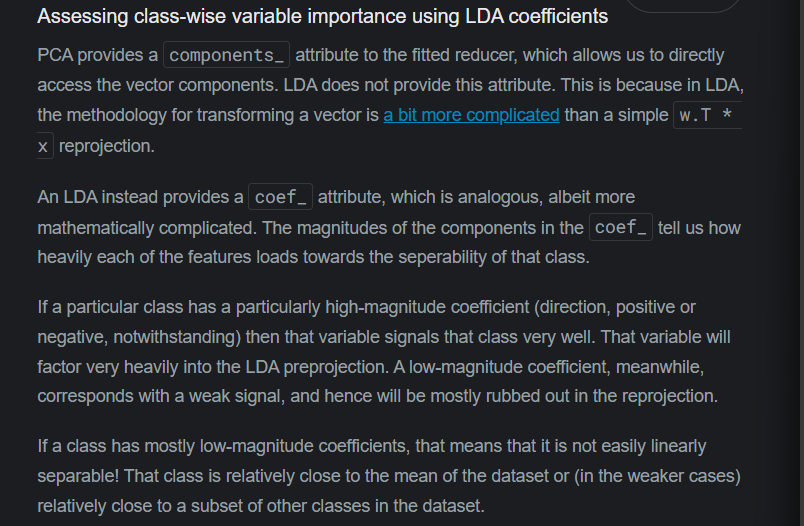

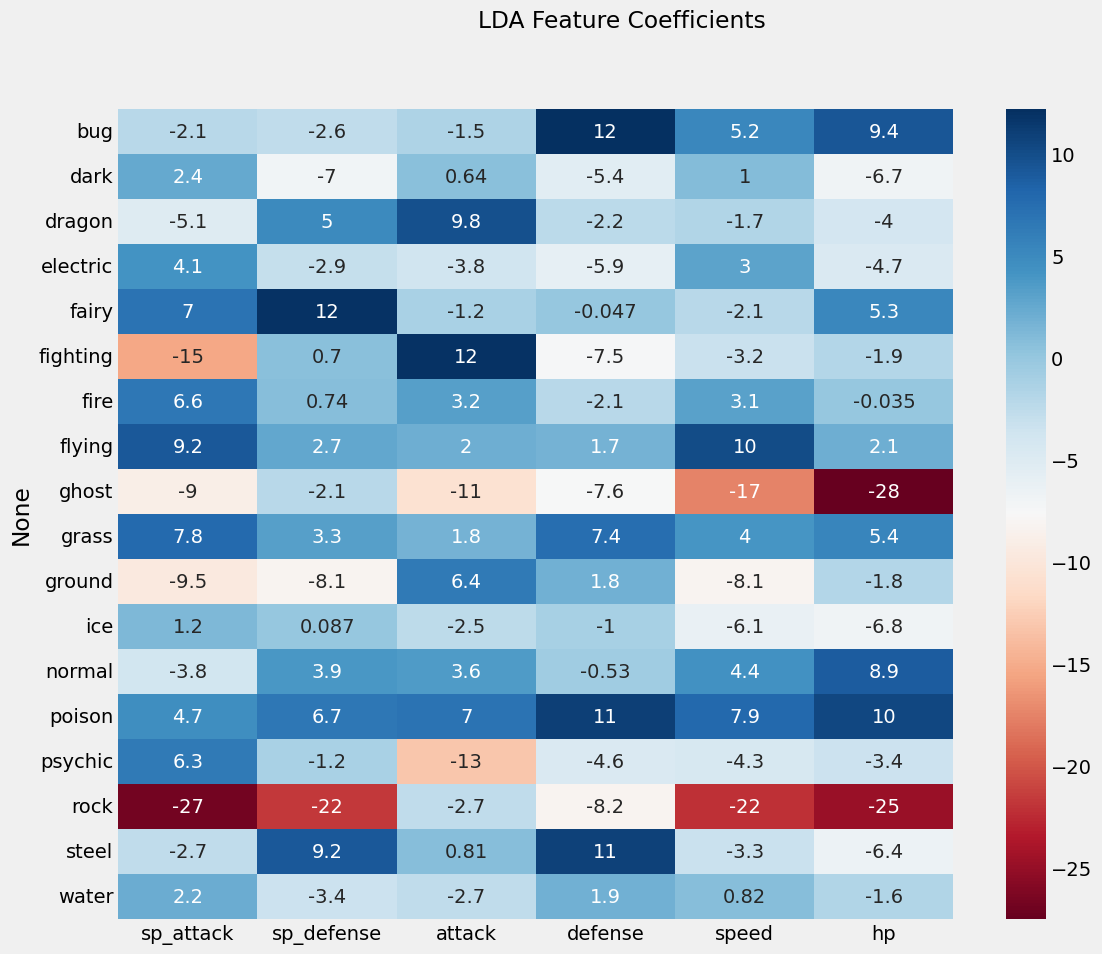

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(pd.DataFrame(lda.coef_,
                         columns=df.columns[:-1],
                         index=[lda.classes_]),
            ax=ax, cmap='RdBu', annot=True)

plt.suptitle('LDA Feature Coefficients')
pass

In [9]:
lda.explained_variance_ratio_


array([0.53031462, 0.20191011, 0.11069559])

/tmp/ipython-input-1720424002.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = mpl.cm.get_cmap(name='tab20').colors


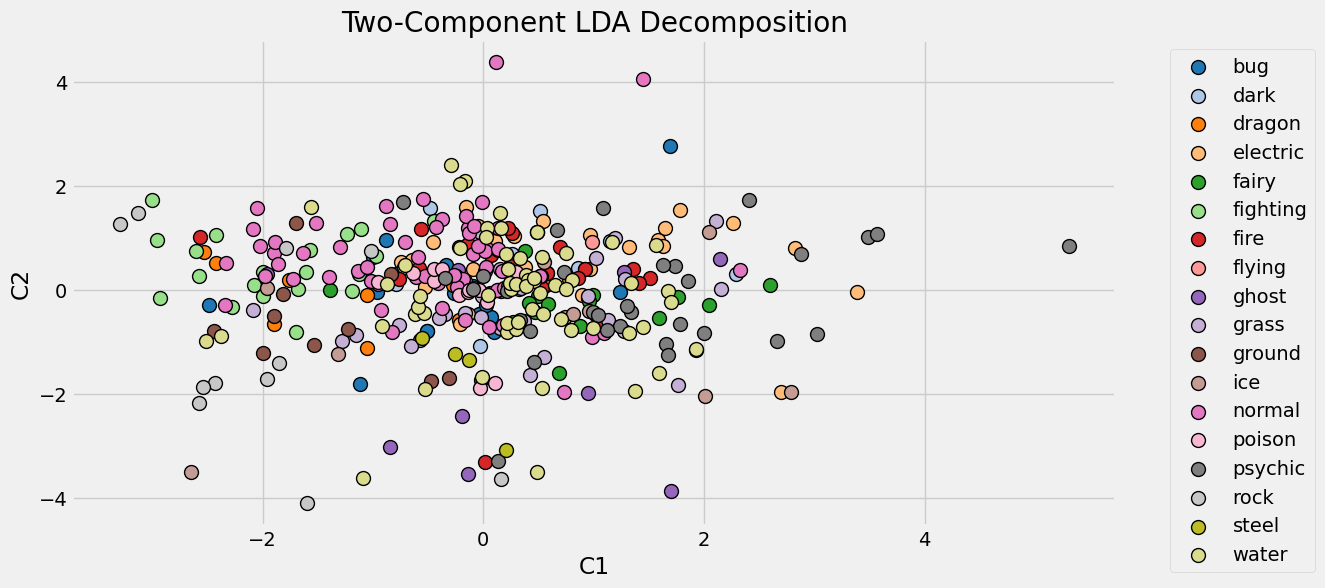

In [8]:
X_hat = lda.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret
         .query('Type == @cat')
         .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1))
    )